# Generare le istanze

Prima assicurati di avere tutti i pachetti necessari installati. Se non hai installato i pacchetti, esegui il comando seguente: 
```bash
pip3 install -r requirements.txt
```

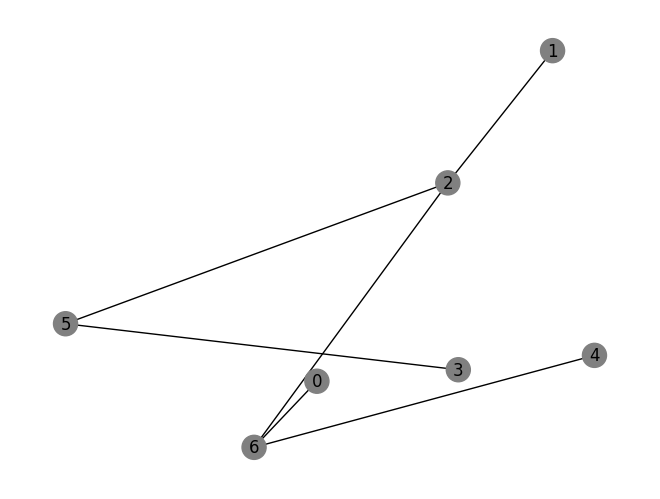

Number of edges:  6
Weight of the edges of the tree:  {(0, 6): 25.942243542145693, (1, 2): 50.15974481593781, (2, 5): 87.92041856133307, (2, 6): 99.16148445843275, (3, 5): 76.68767828015137, (4, 6): 72.44998274671983}
Number of nodes:  7
Number of flows:  3
Flows with their source and destination: [[0, 2], [4, 5], [5, 0]]


In [1]:
import networkx as nx
import utility_functions as uf

# CREATING A TREE NETWORK AND SAVING IT TO A .gml FILE

T, flows = uf.generate_random_network_tree(7, 3, 150)
uf.draw_tree(T)

nx.write_gml(T, "tree_net/tree.gml")

print("Number of edges: ", T.number_of_edges())
print("Weight of the edges of the tree: ", uf.get_weight_of_edges(T))
print("Number of nodes: ", T.number_of_nodes())
print("Number of flows: ", T.graph['K'])
print("Flows with their source and destination:", flows)

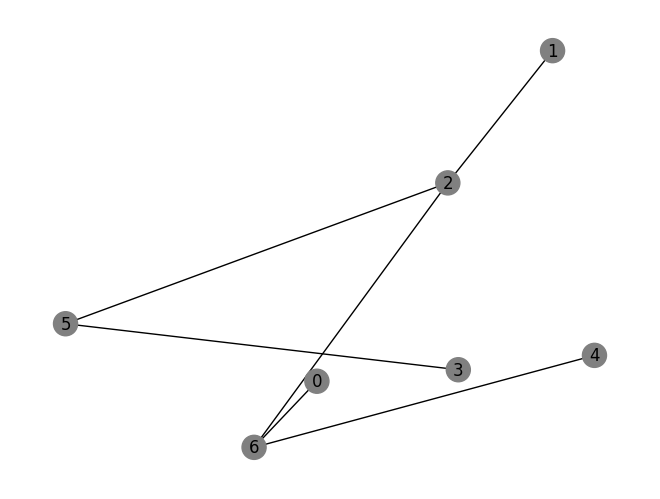

In [2]:
# READING THE TREE NETWORK FROM THE .gml FILE 

T = nx.read_gml("tree_net/tree.gml")
uf.draw_tree(T)

# Prima greedy naive

1. Iniziamo con un insieme vuoto di stazioni di ricarica.
2. Per ogni flusso da origine a destinazione, seguiamo il percorso dell'albero. Partiamo con una carica completa (cioè, l'autonomia è L).
3. Mentre percorriamo il percorso, diminuiamo l'autonomia del veicolo della lunghezza dell'arco corrente.
4. Quando per giungere al nodo successivo l'autonomia non è più sufficiente, posizioniamo una colonnina di ricarica sul nodo corrente. Aggiungiamo questo nodo all'insieme delle stazioni di ricarica.
5. Ripetiamo i passaggi 3-4 fino a quando tutti i veicoli hanno raggiunto le loro destinazioni.

Questa euristica cerca di minimizzare il numero di stazioni di ricarica posizionando ogni stazione il più lontano possibile lungo ogni percorso, dato che ogni veicolo parte con la carica completa e ogni stazione di ricarica ricarica completamente la batteria del veicolo.